### This analysis will be focus on analyzing the PM 2.5 pollution in the United States.
### Exploratory ideas: 
### 1. How does the PM 2.5 pollution vary in different states?
### 2. Is there any seasonality of the PM2.5 pollution during the year?
### 3. Does the seasonality vary in different regions?
### 4. How does the exceptional event influence the PM2.5 value?
### 5. How is each state's efficiency in monitoring the pollution?
### 6. Is there correlation between pollution monitoring efficiency and average PM 2.5 Value?



In [1]:
import folium as folium
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('annual_conc_by_monitor_2019.csv',dtype='object')
df.isna().sum()

Unnamed: 0                           0
County Code                          0
Site Num                             0
Parameter Code                       0
POC                                  0
Latitude                             0
Longitude                            0
Datum                                0
Parameter Name                       0
Sample Duration                      0
Pollutant Standard               36148
Metric Used                          0
Method Name                       8625
Year                                 0
Units of Measure                     0
Event Type                           0
Observation Count                    0
Observation Percent                  0
Completeness Indicator               0
Valid Day Count                      0
Required Day Count                   0
Exceptional Data Count               0
Null Data Count                      0
Primary Exceedance Count         40578
Secondary Exceedance Count       41529
Certification Indicator  

In [3]:
df.shape

(51707, 55)

In [4]:
#Select data for pm 2.5 local conditions
df_pm25= df[(df['Parameter Name']=='PM2.5 - Local Conditions')&(df.POC=='1')]
df_pm25.head()

,Unnamed: 0,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.7,7.3,3.9,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19
5,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.7,7.3,3.9,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19
6,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.7,7.3,3.9,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19
7,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.7,7.3,3.9,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19
8,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.6,7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,11/12/19


In [5]:
#average mean value for state level
df_pm25.loc[:,'Arithmetic Mean']=pd.to_numeric(df_pm25.loc[:,'Arithmetic Mean'], errors='coerce')
df_state=df_pm25.groupby(['State Name'])['Arithmetic Mean'].mean().reset_index(name='Average Value')
df_state.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,State Name,Average Value
0,Alabama,7.866685
1,Alaska,9.182726
2,Arizona,5.711529
3,Arkansas,8.566298
4,California,7.247355


In [6]:
#Order the states with Highest PM 2.5 index
df_state.sort_values(['Average Value'],ascending=False).groupby('State Name').head()

,State Name,Average Value
1,Alaska,9.182726
13,Illinois,8.894237
25,Missouri,8.877945
14,Indiana,8.668327
44,Texas,8.581777
3,Arkansas,8.566298
38,Pennsylvania,8.490150
8,District Of Columbia,8.406468
10,Georgia,8.382870
35,Ohio,8.153011


In [7]:
#import the state-region mapping data
df_region=pd.read_csv('states.csv')

In [8]:
# clean the unmatched state-region data
df_pm25=pd.merge(df_pm25,df_region,left_on='State Name',right_on='State',how='outer')
df_null=df_pm25[df_pm25['Region'].isna()]
df_null['State Name'].unique()

array(['District Of Columbia', 'Puerto Rico', 'Virgin Islands'],
      dtype=object)

In [9]:
df_pm25.loc[df_pm25['State Name']=='District Of Columbia','Region']= 'South'
df_pm25.loc[df_pm25['State Name']=='Puerto Rico','Region']= 'South'
df_pm25.loc[df_pm25['State Name']=='Virgin Islands','Region']= 'South'

In [10]:
region_quarter_table_2 = df_pm25.groupby(['Region'])['Arithmetic Mean'].mean().reset_index(name='Average')
region_quarter_table_2

,Region,Average
0,Midwest,8.054444
1,Northeast,6.444022
2,South,7.624712
3,West,5.873743


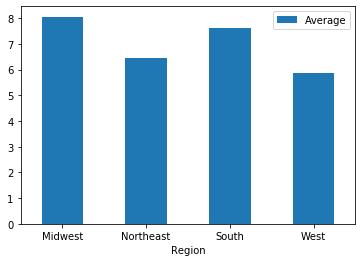

In [11]:
#Region annual average value
region_quarter_plot_2 = region_quarter_table_2.plot.bar(x='Region',y='Average',rot=0)

### Overall, the four different regions have very close mean value of PM2.5 recorded during the year. Midwest region has slightly higher mean value comparing to the others.

In [12]:
## Country coordinates for plotting
country_geo = 'us_states.json'

In [13]:
state_codes = {
    'District Of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME', 'Puerto Rico':'PR','Virgin Islands':'VI'}

df_state['state_code'] = df_state['State Name'].apply(lambda x : state_codes[x])

In [14]:
map = folium.Map(location=[55, -110], zoom_start=2.5)

In [15]:
map.choropleth(geo_data=country_geo, data=df_state,
             columns=['state_code','Average Value'],
            key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,legend_name='Average PM2.5 Value')

/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [16]:
map.save('plot_data.html')

In [17]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [18]:
#Get the month of when the 1st Max Value was recorded(peak value during the year)
df_pm25['1st Max Month'] = df_pm25['1st Max DateTime'].apply(lambda d: str(d).split('/')[0].strip())
df_pm25.head()

,Unnamed: 0,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,State Name,County Name,City Name,CBSA Name,Date of Last Change,State,State Code,Region,Division,1st Max Month
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7
4,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Alabama,Clay,Ashland,NaN,11/12/19,Alabama,AL,South,East South Central,6


In [19]:
df_pm25.loc[:,'1st Max Month']=pd.to_numeric(df_pm25.loc[:,'1st Max Month'], errors='coerce')

In [20]:
#Seasonality-Get the quarter of when the peak value was recorded
df_pm25['1st Max Quarter']=pd.cut(df_pm25['1st Max Month'], bins=[1,3,6,9,12], labels=['Q1', 'Q2', 'Q3','Q4'])

In [21]:
df_pm25.head()

,Unnamed: 0,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,County Name,City Name,CBSA Name,Date of Last Change,State,State Code,Region,Division,1st Max Month,1st Max Quarter
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7.0,Q3
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7.0,Q3
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7.0,Q3
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",11/12/19,Alabama,AL,South,East South Central,7.0,Q3
4,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,Clay,Ashland,NaN,11/12/19,Alabama,AL,South,East South Central,6.0,Q2


In [22]:
#Create a chart to show the number of peak value recorded during different Quarter
df_quarter=df_pm25.groupby(['1st Max Quarter'])['1st Max Quarter'].count().reset_index(name='Peak Value Count')
df_quarter

,1st Max Quarter,Peak Value Count
0,Q1,1133
1,Q2,687
2,Q3,247
3,Q4,0


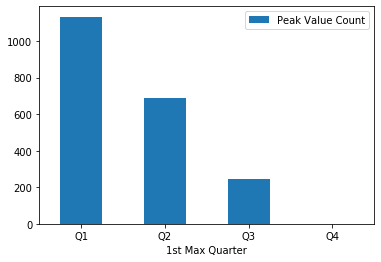

In [23]:
quarter_plot = df_quarter.plot.bar(x='1st Max Quarter',y='Peak Value Count',rot=0)

### From this chart, we could see that most of the peak value of PM2.5 were recorded during Q1 and Q2, 0 was recorded during Q4

In [24]:
#Create a chart to show the number of peak value recorded during each month
df_month=df_pm25.groupby(['1st Max Month'])['1st Max Month'].count().reset_index(name='Peak Value Count')

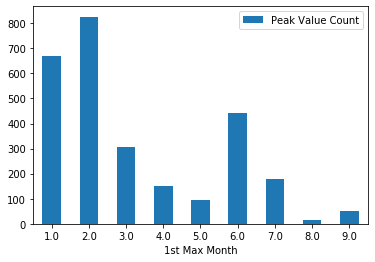

In [25]:
month_plot = df_month.plot.bar(x='1st Max Month',y='Peak Value Count',rot=0)

### Feburary has recored the most peak value of PM2.5 during the year, January the second and June the third.

In [26]:
region_quarter_table = pd.crosstab(df_pm25['Region'], df_pm25['1st Max Quarter'], margins=True)
region_quarter_table

1st Max Quarter,Q1,Q2,Q3,All
Region,,,,
Midwest,405,64,49,518
Northeast,240,73,20,333
South,294,387,118,799
West,194,163,60,417
All,1133,687,247,2067


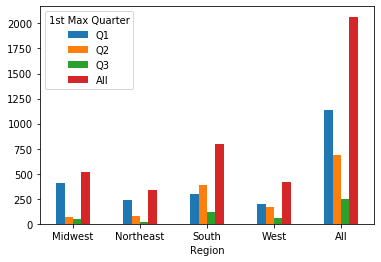

In [27]:
region_quarter_plot = region_quarter_table.plot.bar(rot=0)

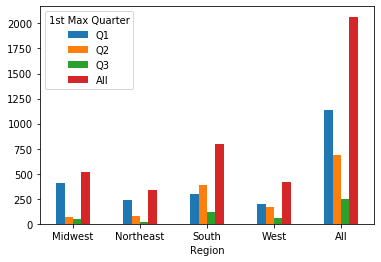

In [28]:
#Region + Seasonaility (number of peak value recorded)
region_quarter_plot = region_quarter_table.plot.bar(rot=0)

### From above graph, we could see that Midwest, North and west regions have recorded the most peak value of PM2.5 during Q1.  South Region has recorded the most peak value during Q2.

In [29]:
df_pm25.loc[df_pm25['Event Type']=='No Events','Event']= 0
df_pm25.loc[df_pm25['Event Type']=='Concurred Events Excluded','Event']= 1
df_pm25.loc[df_pm25['Event Type']=='Events Included','Event']= 1
df_pm25.loc[df_pm25['Event Type']=='Events Excluded','Event']= 1

In [30]:
event_quarter=df_pm25.groupby(['1st Max Quarter'])['Event'].sum().reset_index(name='Total Event')

In [31]:
event_quarter

,1st Max Quarter,Total Event
0,Q1,96.0
1,Q2,42.0
2,Q3,58.0
3,Q4,0.0


In [32]:
event_peak=pd.merge(df_quarter, event_quarter, on='1st Max Quarter',how='outer')

In [33]:
event_peak

,1st Max Quarter,Peak Value Count,Total Event
0,Q1,1133,96.0
1,Q2,687,42.0
2,Q3,247,58.0
3,Q4,0,0.0


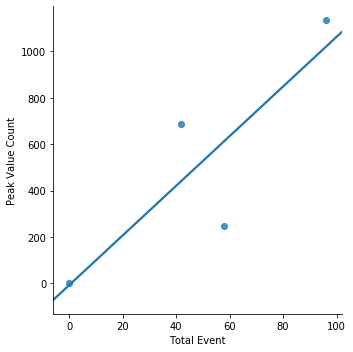

In [34]:
sns.lmplot(x="Total Event", y="Peak Value Count", data=event_peak, order=1, ci=None)

### From above chart, we could see that there is positive linear correlation between the number of event happened and the number of peak value recorded during the quarter

In [35]:
event_month=df_pm25.groupby(['1st Max Month'])['Event'].sum().reset_index(name='Total Event')

In [36]:
event_month

,1st Max Month,Total Event
0,1.0,42.0
1,2.0,71.0
2,3.0,25.0
3,4.0,31.0
4,5.0,7.0
5,6.0,4.0
6,7.0,49.0
7,8.0,4.0
8,9.0,5.0


In [37]:
event_peak2=pd.merge(df_month, event_month, on='1st Max Month',how='outer')

In [38]:
event_peak2

,1st Max Month,Peak Value Count,Total Event
0,1.0,669,42.0
1,2.0,826,71.0
2,3.0,307,25.0
3,4.0,152,31.0
4,5.0,94,7.0
5,6.0,441,4.0
6,7.0,180,49.0
7,8.0,17,4.0
8,9.0,50,5.0


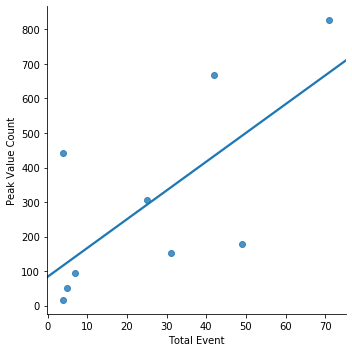

In [39]:
sns.lmplot(x="Total Event", y="Peak Value Count", data=event_peak2, order=1, ci=None)

### From above chart, we could see that there is also positive linear correlation between the number of event happened and the number of peak value recorded during the month

In [40]:
event_region=df_pm25.groupby(['Region'])['Event'].sum().reset_index(name='Total Event')

In [41]:
event_region

,Region,Total Event
0,Midwest,47.0
1,Northeast,0.0
2,South,66.0
3,West,125.0


In [42]:
event_region_merge=pd.merge(region_quarter_table_2, event_region, on='Region',how='outer')

In [43]:
event_region_merge

,Region,Average,Total Event
0,Midwest,8.054444,47.0
1,Northeast,6.444022,0.0
2,South,7.624712,66.0
3,West,5.873743,125.0


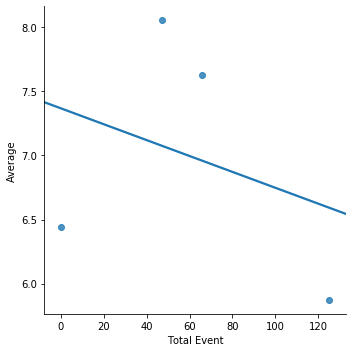

In [44]:
sns.lmplot(x="Total Event", y="Average", data=event_region_merge, order=1, ci=None)

### From above chart, we could see that there is no positive linear correlation between the number of event happened and average PM 2.5 value during the year 

In [45]:
df_pm25.loc[:,'Valid Day Count']=pd.to_numeric(df_pm25.loc[:,'Valid Day Count'], errors='coerce')

In [46]:
df_pm25.loc[:,'Required Day Count']=pd.to_numeric(df_pm25.loc[:,'Required Day Count'], errors='coerce')

In [47]:
df_x = pd.DataFrame(df_pm25, columns = ['Region','State Name','Valid Day Count','Required Day Count'])

In [48]:
df_x

,Region,State Name,Valid Day Count,Required Day Count
0,South,Alabama,62.0,121.0
1,South,Alabama,62.0,121.0
2,South,Alabama,62.0,121.0
3,South,Alabama,62.0,121.0
4,South,Alabama,63.0,121.0
...,...,...,...,...
2732,South,Virgin Islands,181.0,365.0
2733,South,Virgin Islands,181.0,365.0
2734,South,Virgin Islands,181.0,365.0
2735,South,Virgin Islands,181.0,365.0


In [49]:
df_pm25['Valid Day Ratio']= df_pm25['Valid Day Count']/df_pm25['Required Day Count']*100

In [50]:
valid_day=df_pm25.groupby(['State'])['Valid Day Ratio'].mean().reset_index(name='Avg_Valid_Day_Ratio')

In [51]:
valid_day.replace({'District of Columbia':'District Of Columbia'})

,State,Avg_Valid_Day_Ratio
0,Alabama,47.658934
1,Alaska,46.747137
2,Arizona,55.640931
3,Arkansas,66.050910
4,California,54.187416
5,Colorado,47.342400
6,Connecticut,48.817911
7,Delaware,61.200498
8,District Of Columbia,NaN
9,Florida,43.553719


In [52]:
df_sort = valid_day.sort_values(by=['Avg_Valid_Day_Ratio'])

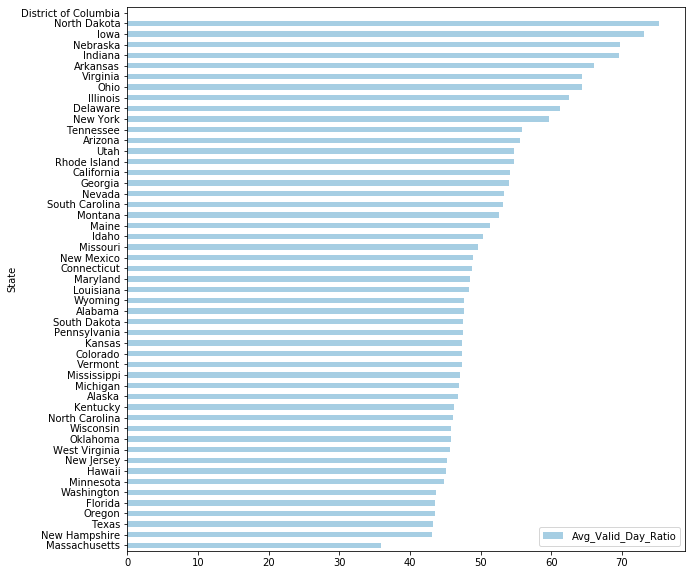

In [53]:
ax = df_sort.plot.barh(x='State', y='Avg_Valid_Day_Ratio', rot=0,figsize=(10,10),colormap='Paired')

In [54]:
valid_day_last5=df_sort.iloc[0:5]

In [55]:
valid_day_last5

,State,Avg_Valid_Day_Ratio
21,Massachusetts,35.987979
29,New Hampshire,43.095696
43,Texas,43.285415
37,Oregon,43.544703
9,Florida,43.553719


In [56]:
state_validday_merge=pd.merge(df_state,valid_day,left_on='State Name',right_on='State',how='outer')
mergetable = pd.DataFrame(state_validday_merge, columns = ['State','Average Value','Avg Valid Day Ratio'])

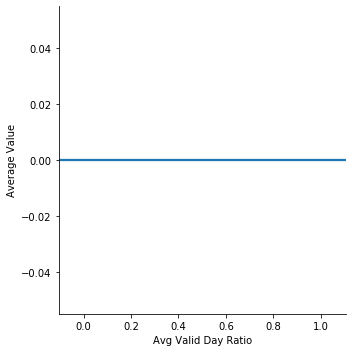

In [57]:
sns.lmplot(x="Avg Valid Day Ratio", y="Average Value", data=mergetable, order=1, ci=None)

### It seems there is slight positive correlation between the efficiency and the average PM 2.5 value during the year